# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
# laod dataset_ML_govvies.xlsx
df = pd.read_excel('dataset_ML_govvies.xlsx')

# Clean data

In [4]:
# delete rows of column Bonds of df that contains the string that is in deleteList
deleteList = ['15+|AU', '15+|CA', '15+|DE', '15+|JP', '15+|SW', '15+|UK', '15+|US']
df_cleaned = df[~df['Bond'].isin(deleteList)]
# find the latest row that contains nan in df_cleaned
df_cleaned[df_cleaned['Return_PD'].isnull()].iloc[-1]
# delete rows before date 1990-04-30 of df_cleaned
df_cleaned = df_cleaned[df_cleaned['Date'] > '1990-04-30']
df_cleaned.fillna(df_cleaned.groupby('Date').transform('median'), inplace=True)


C:\Users\sunny\AppData\Local\Temp\ipykernel_23164\527385249.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_cleaned.fillna(df_cleaned.groupby('Date').transform('median'), inplace=True)


In [5]:
df_cleaned.head()

Date          Bond  Return_PD  101_%QoQ  101_%QoQ_diff  101_%YoY  \
5208 1990-05-31  10_15/10+|AU   0.002171  0.008008       0.010750  0.035059   
5209 1990-05-31  10_15/10+|CA   0.007258  0.009428       0.011562  0.014740   
5210 1990-05-31  10_15/10+|DE   0.001799  0.008718       0.009854  0.021477   
5211 1990-05-31  10_15/10+|JP   0.003973  0.008718       0.009854  0.021477   
5212 1990-05-31  10_15/10+|SW   0.004587  0.008718       0.009854  0.021477   

      102_%QoQ  102_%QoQ_diff  102_%YoY  103_%QoQ  ...  Reversal_1_day  \
5208  0.010161       0.002763  0.035734  0.023237  ...        0.006324   
5209  0.015788       0.009270  0.033000  0.019461  ...        0.001875   
5210  0.010161       0.004070  0.033000  0.019461  ...        0.001353   
5211  0.010161       0.004070  0.033000  0.019461  ...        0.000474   
5212  0.010161       0.004070  0.033000  0.019461  ...        0.000548   

      Reversal_1_month  Reversal_1_week  Rolldown      Skew    Value  \
5208          0.023973         0.018304 -0.055215 -0.210573  0.70133   
5209          0.046633        -0.012313  0.013860  0.019228 -0.50300   
5210          0.047013         0.010727 -0.010062  0.600304  0.70133   
5211          0.000060         0.000104 -0.014053  5.455132  0.70133   
5212          0.014874         0.006811 -0.075799 -0.155847  0.70133   

           Vol  Vol_Change  Vol_Of_Vol   Yield  
5208  0.003785   -0.000781    0.000320  14.272  
5209  0.003833    0.000064    0.000118  11.889  
5210  0.003592    0.001504    0.000548   8.755  
5211  0.003349    0.001453    0.000707   6.893  
5212  0.002862    0.000078    0.000123  13.710  

[5 rows x 88 columns]

In [112]:
# save df_cleaned to xslx
df_cleaned.to_excel('dataset_ML_govvies_cleaned.xlsx')

# Investigate empty points

In [33]:
# check how many nans there is for each 42 rows in the column "Return_PD", if yes save the amount of nans into an array
nan_array = []
x = []
for i in range(0, len(df), 42):
    x.append(df['Date'][i])
    nan_array.append(df['Return_PD'][i:i+42].isnull().sum())

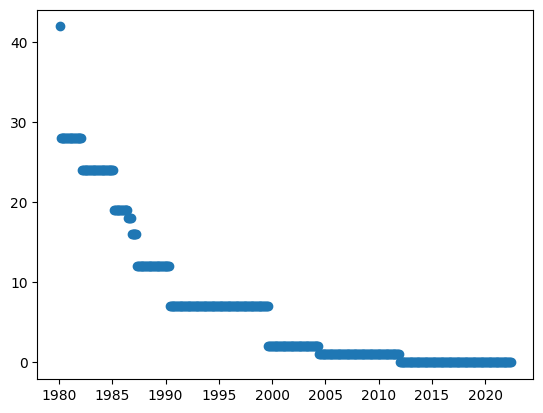

In [34]:
# plot the nan_array
plt.scatter(x, nan_array)

In [35]:
# sepererate df into 42 dfs with splitting each row
df_list = []
for i in range(42):
    df_list.append(df.iloc[i::42,:])

for i in range(42):
    # reokace nan with 10
    df_list[i]['Return_PD'] = df_list[i]['Return_PD'].fillna(0.1)

C:\Users\sunny\AppData\Local\Temp\ipykernel_23164\3276557547.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i]['Return_PD'] = df_list[i]['Return_PD'].fillna(0.1)


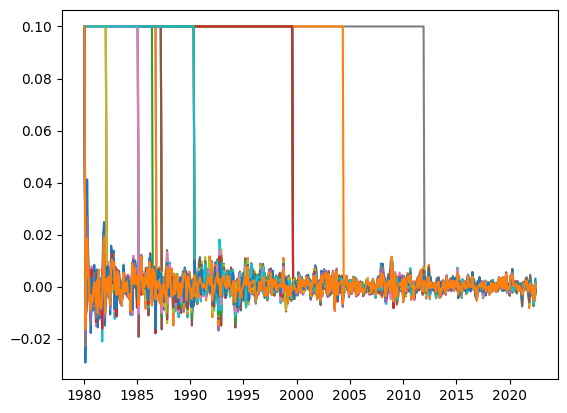

In [36]:
# plots all of df_list in one plot

for i in range(42):
    plt.plot(df_list[i]['Date'], df_list[i]['Return_PD'])

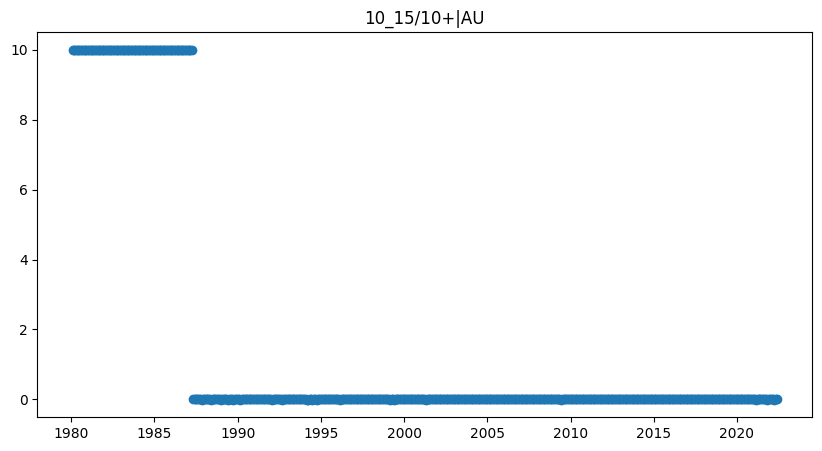

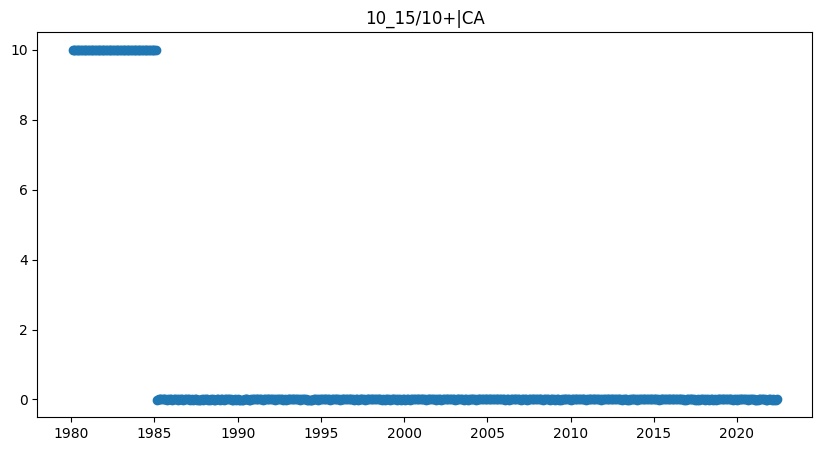

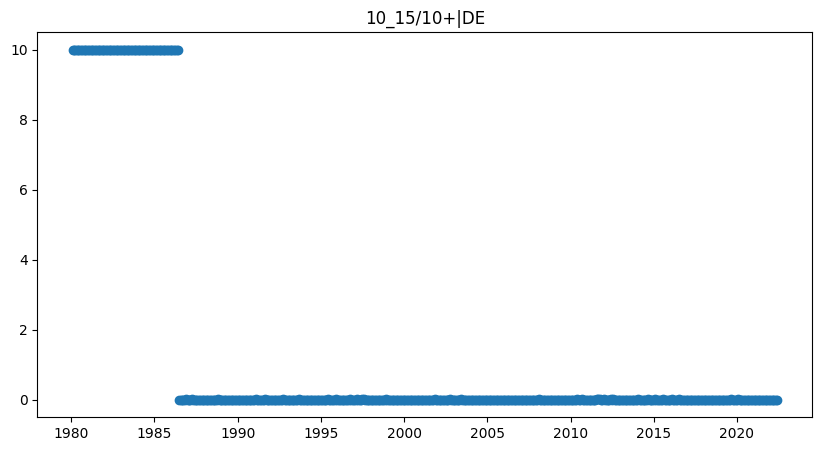

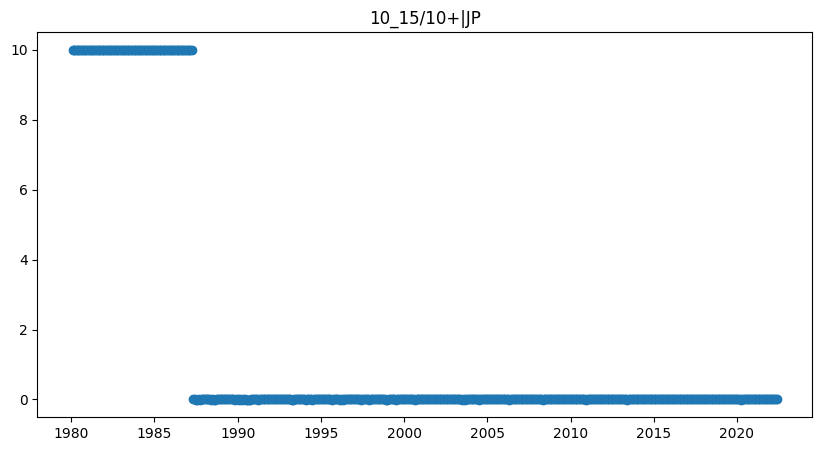

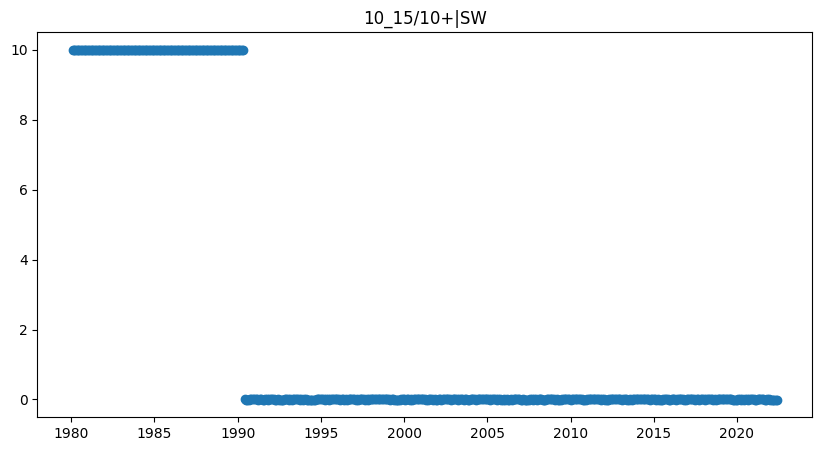

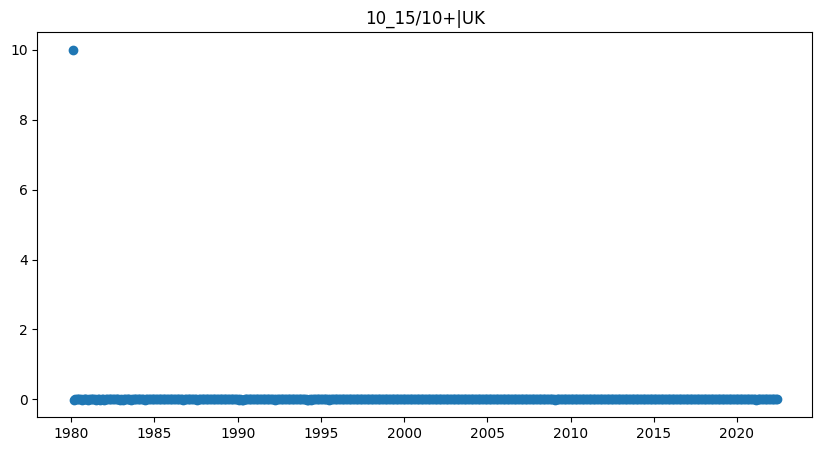

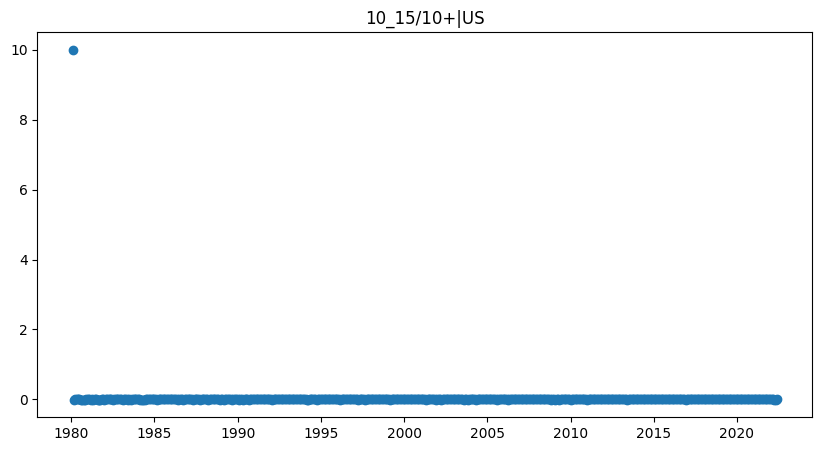

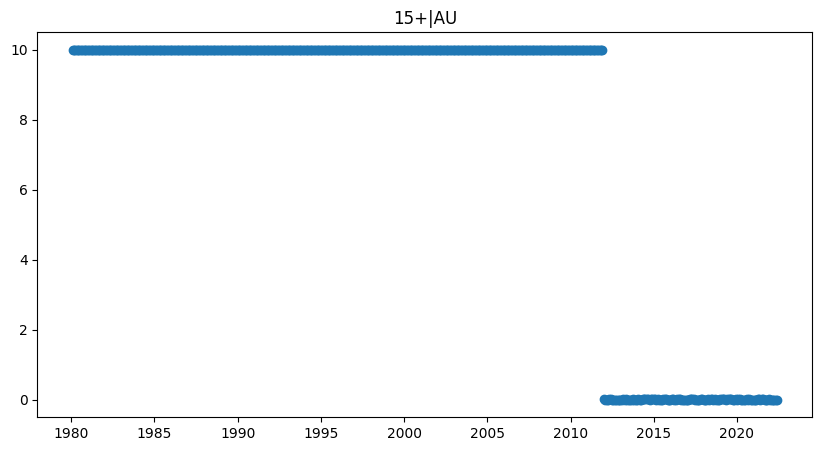

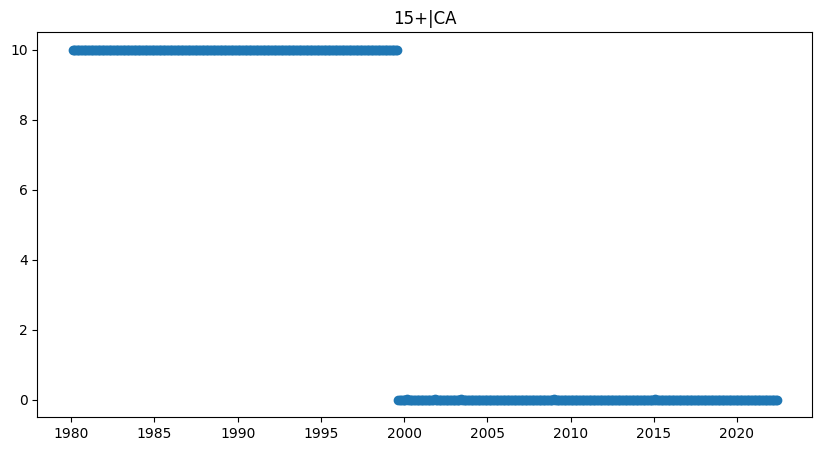

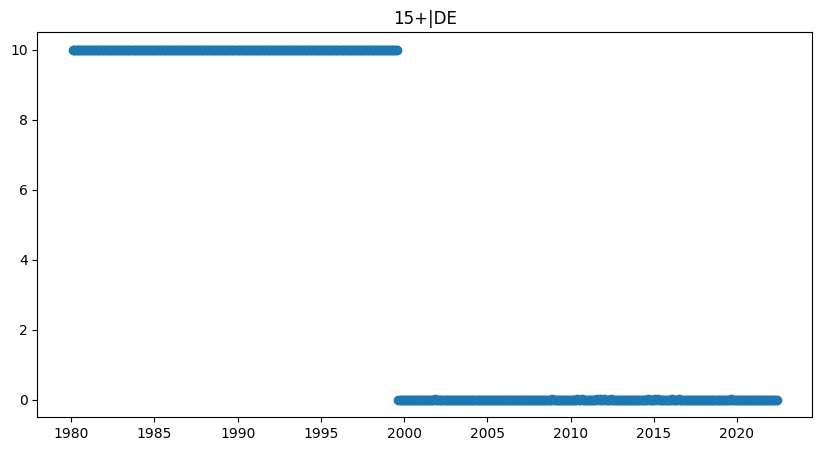

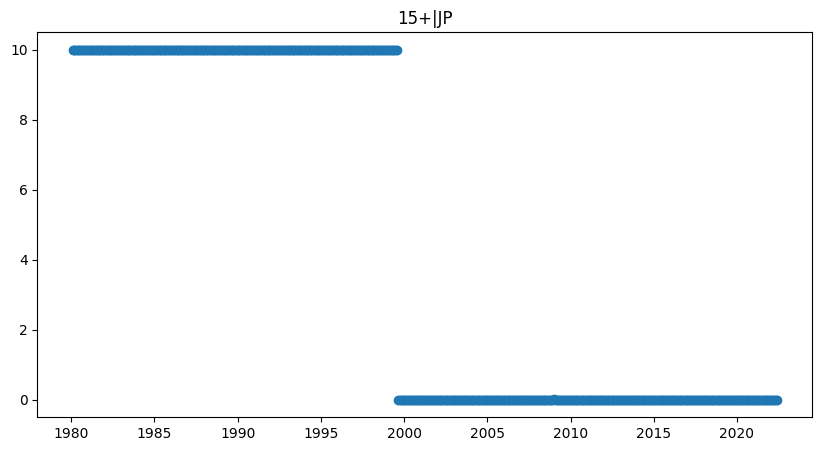

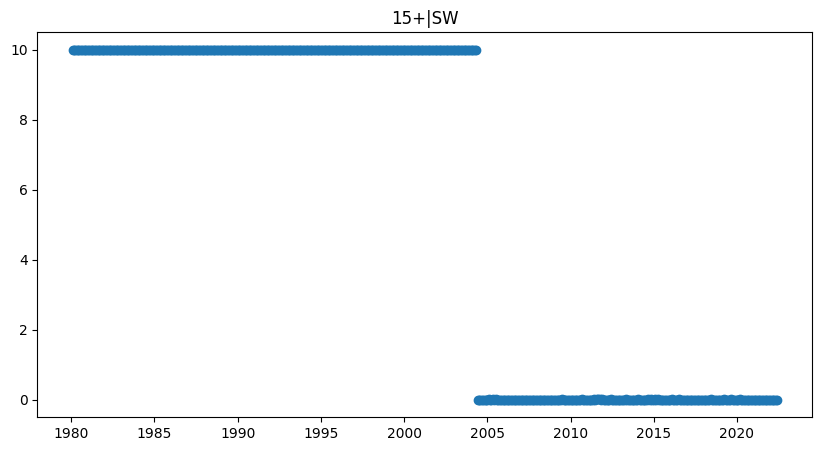

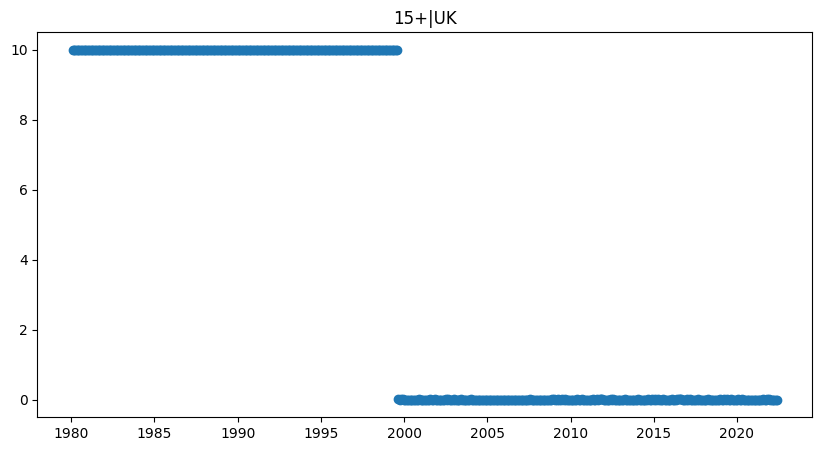

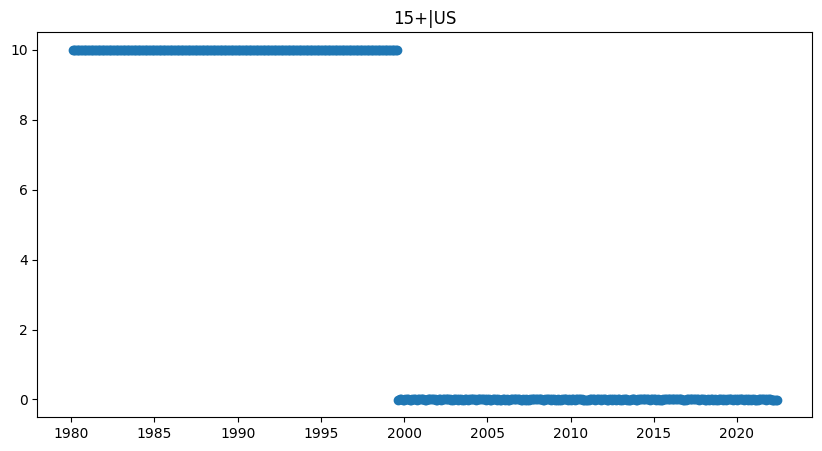

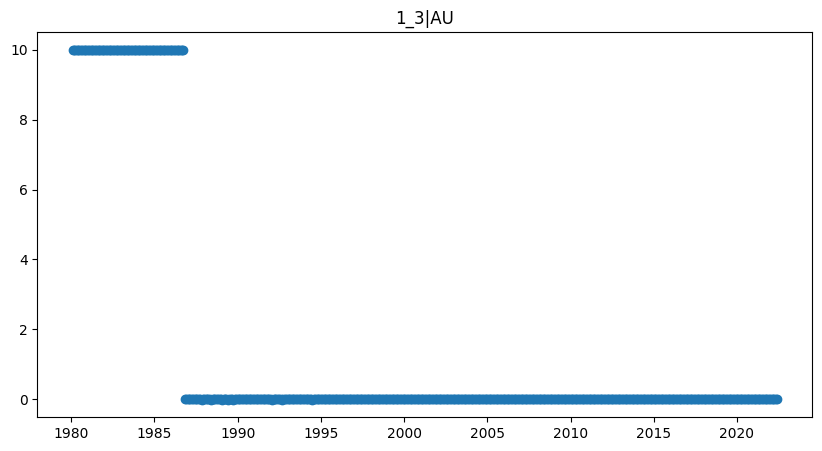

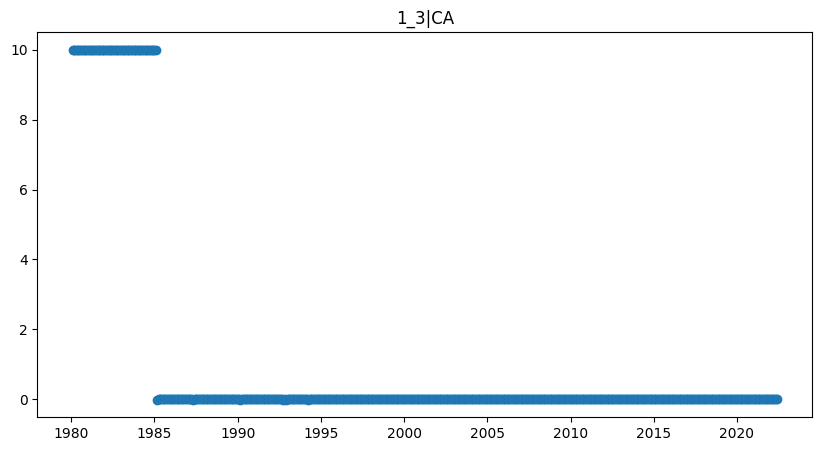

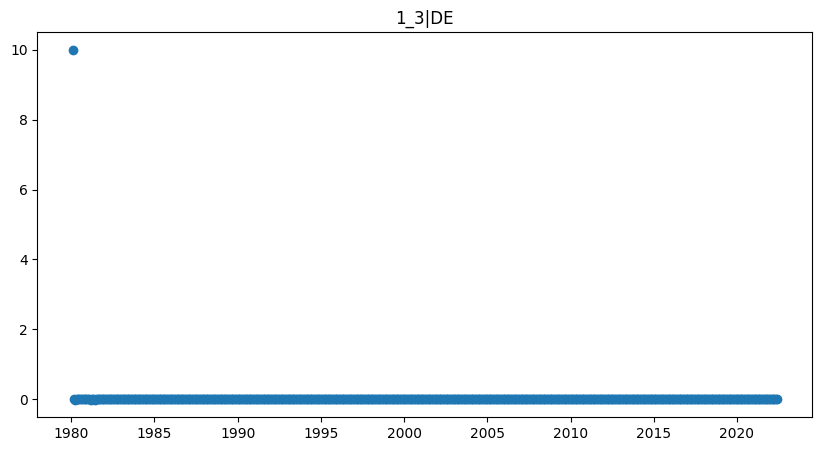

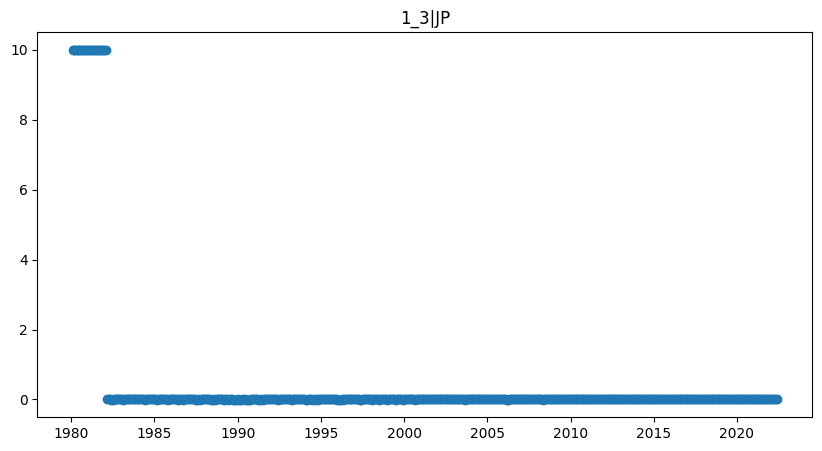

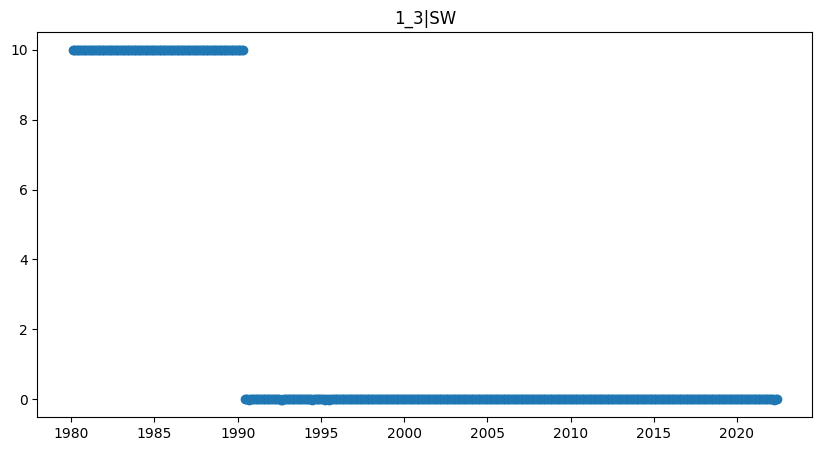

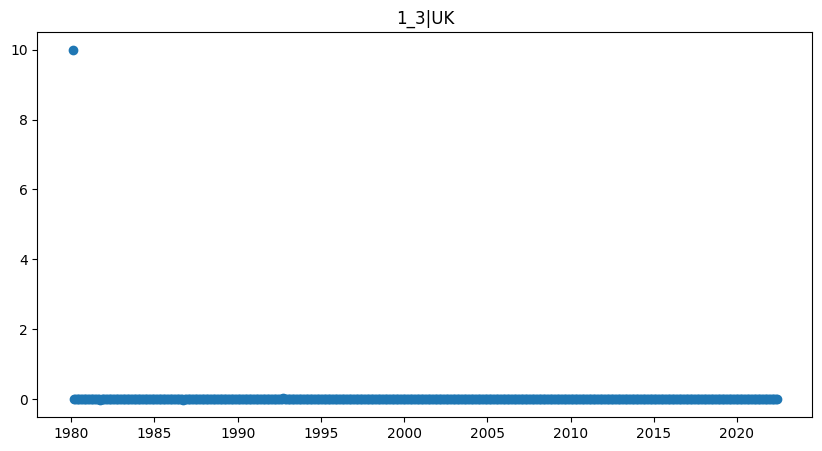

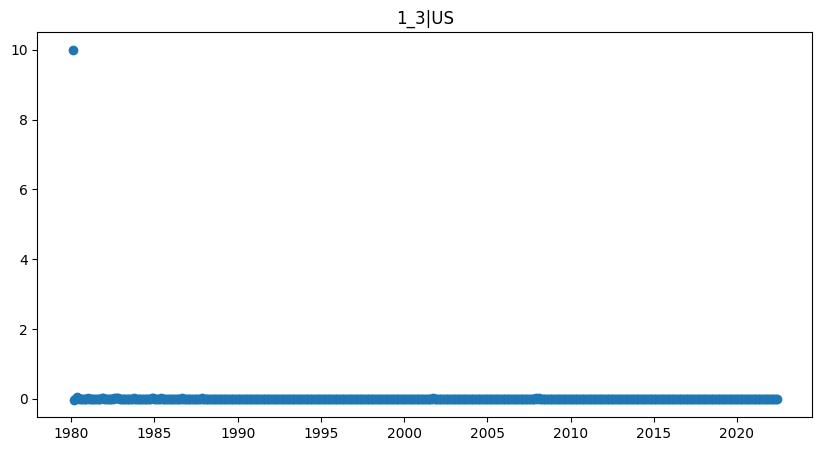

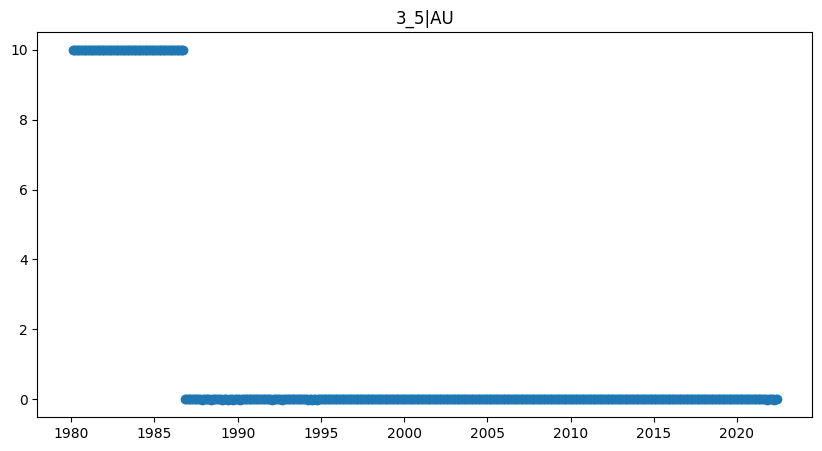

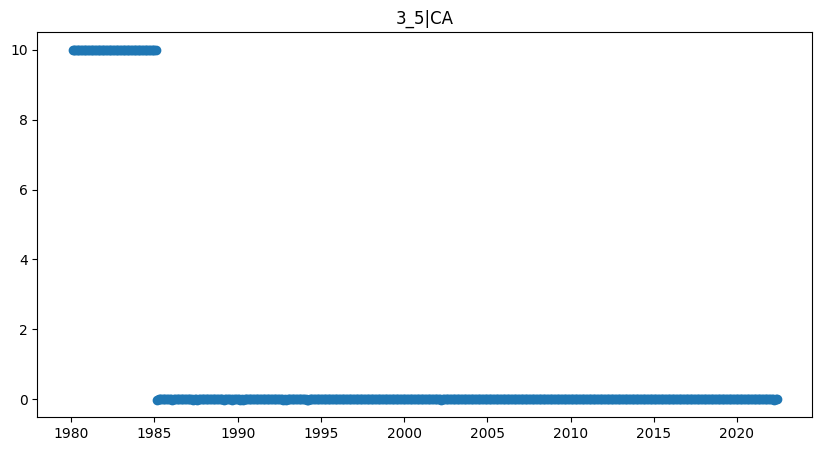

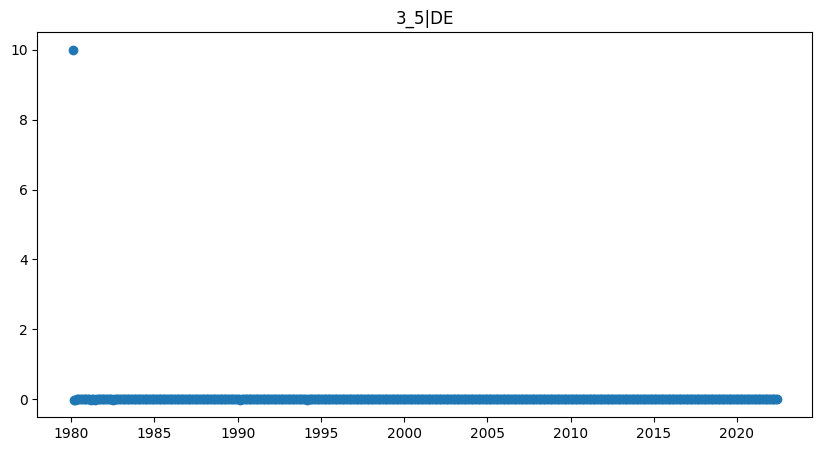

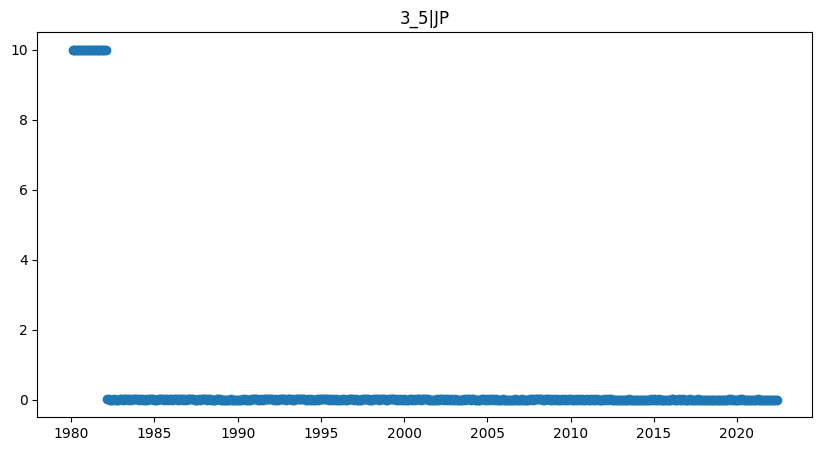

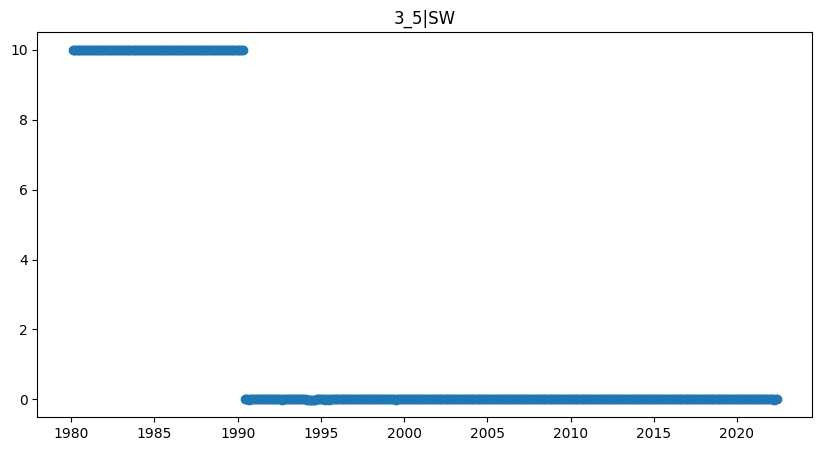

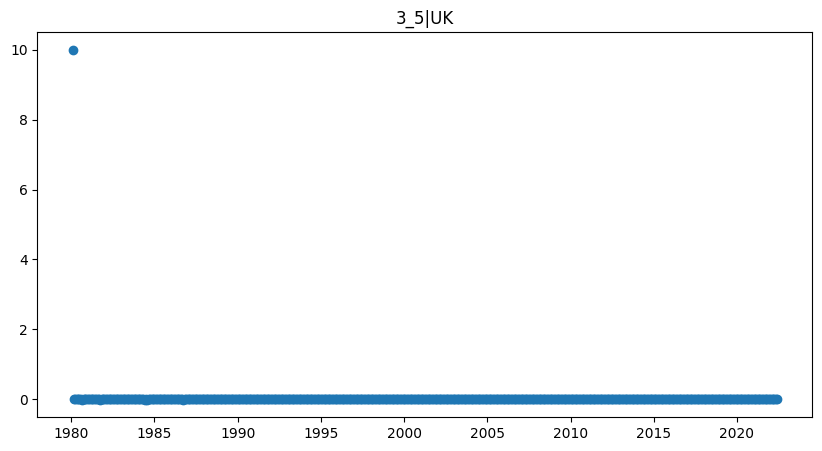

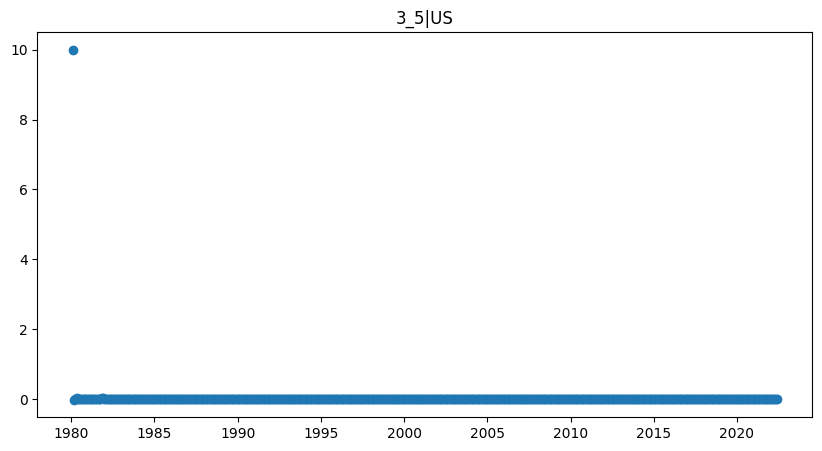

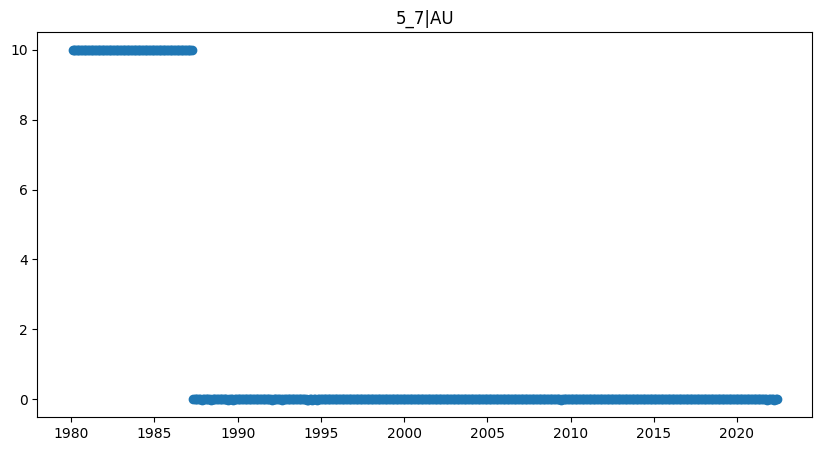

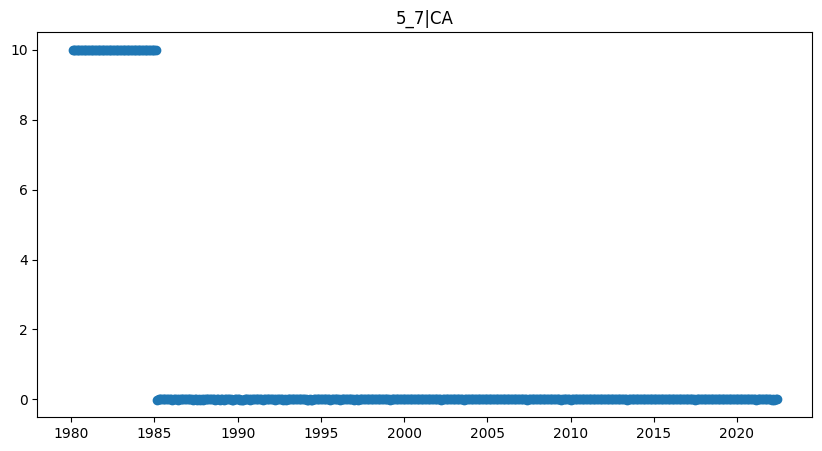

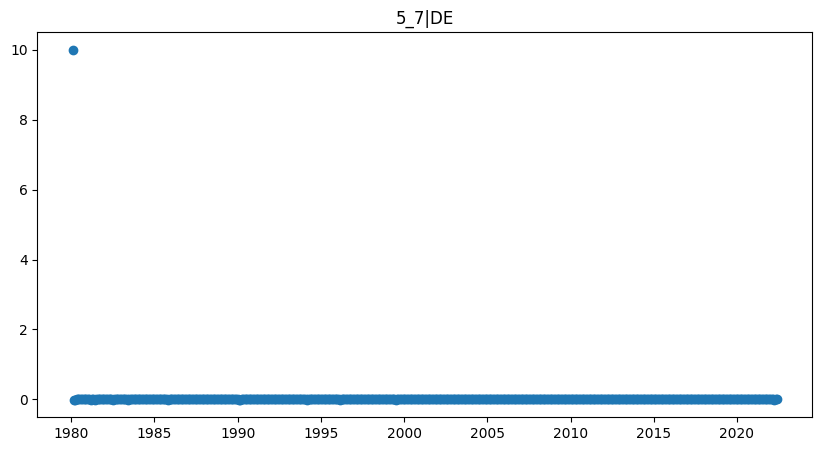

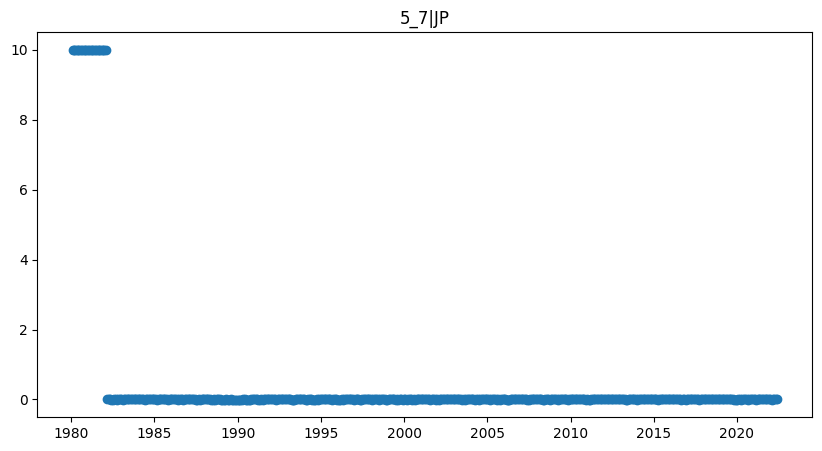

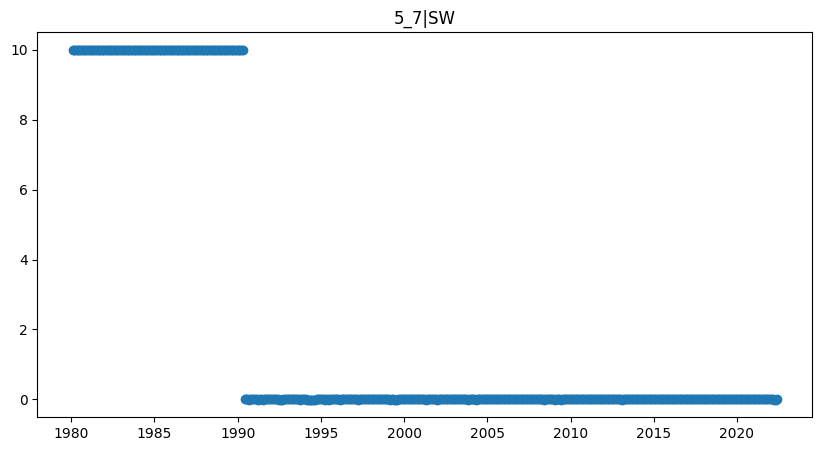

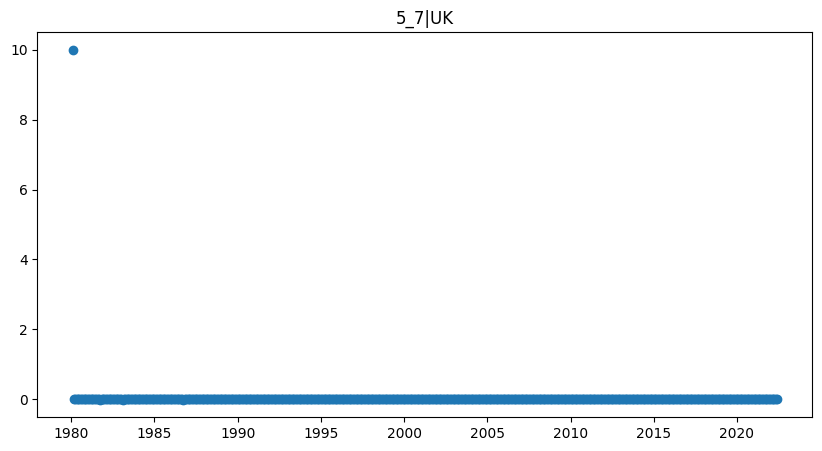

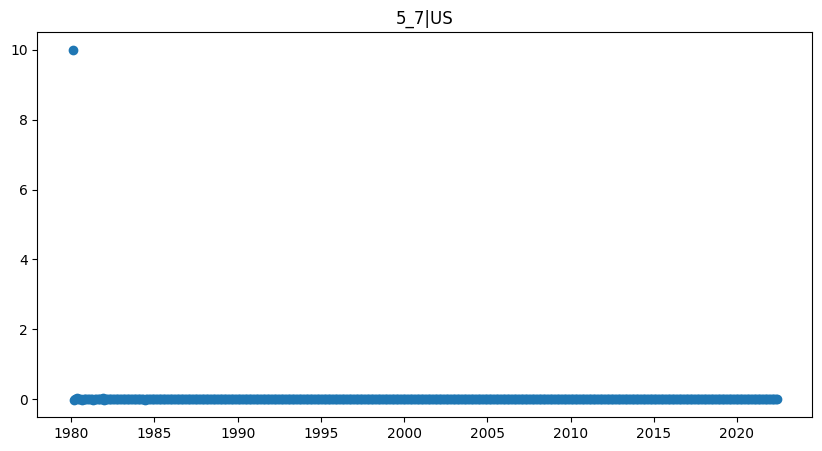

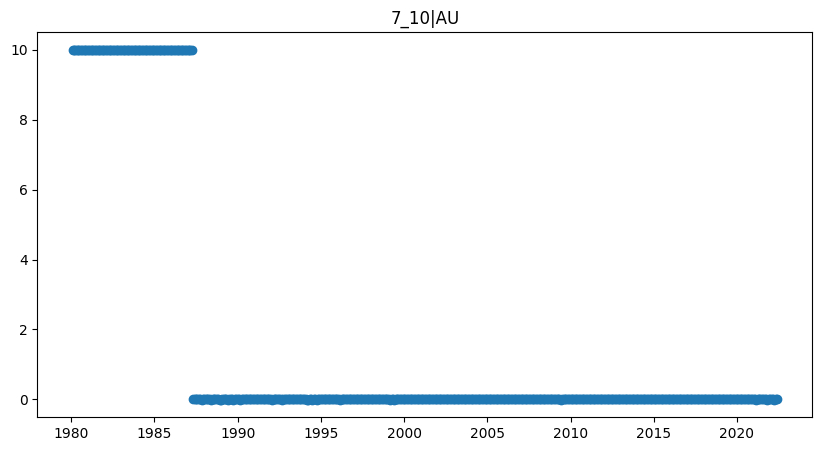

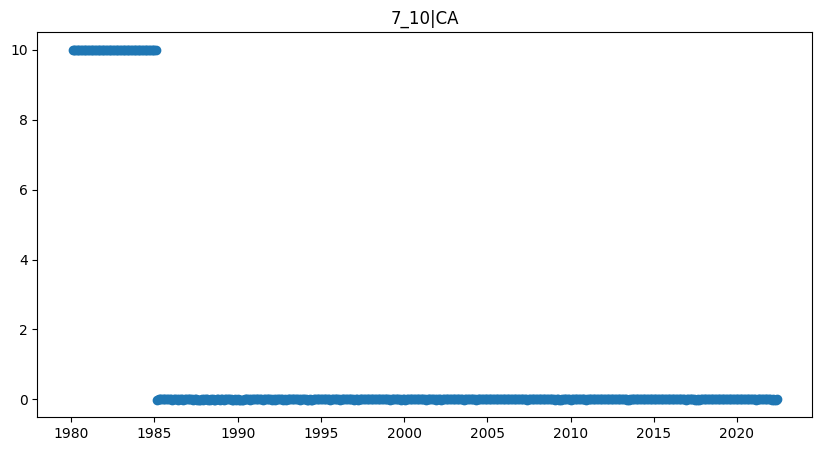

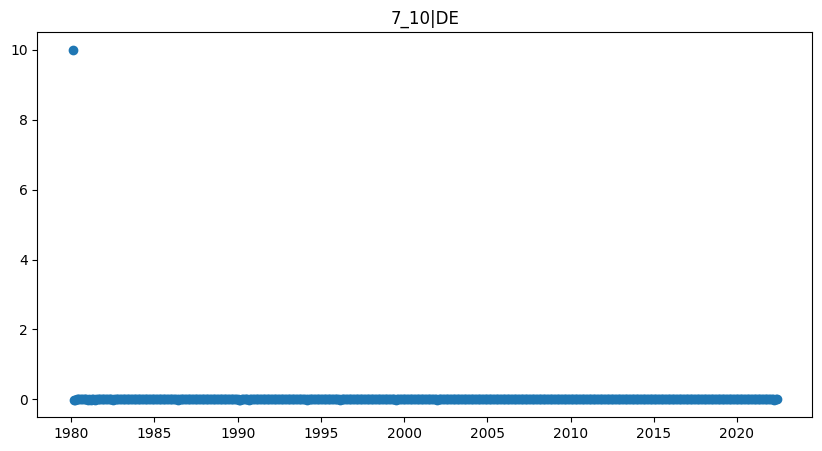

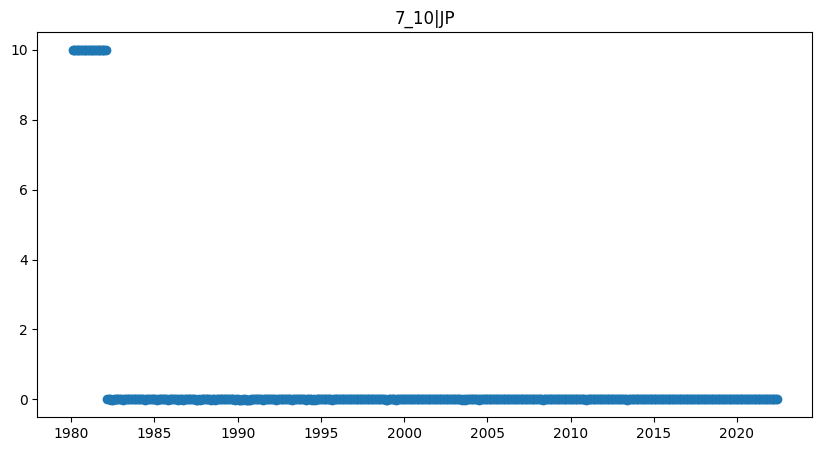

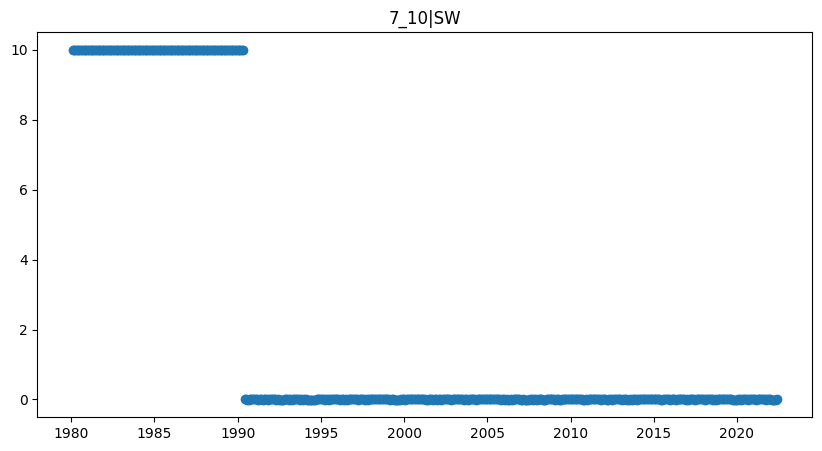

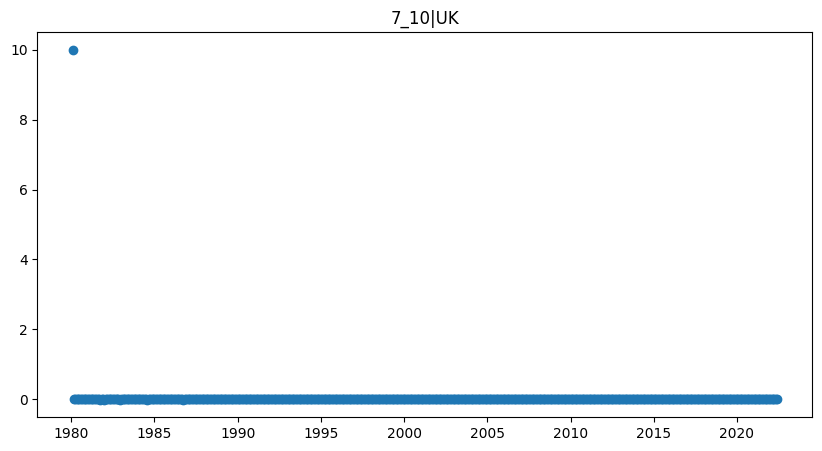

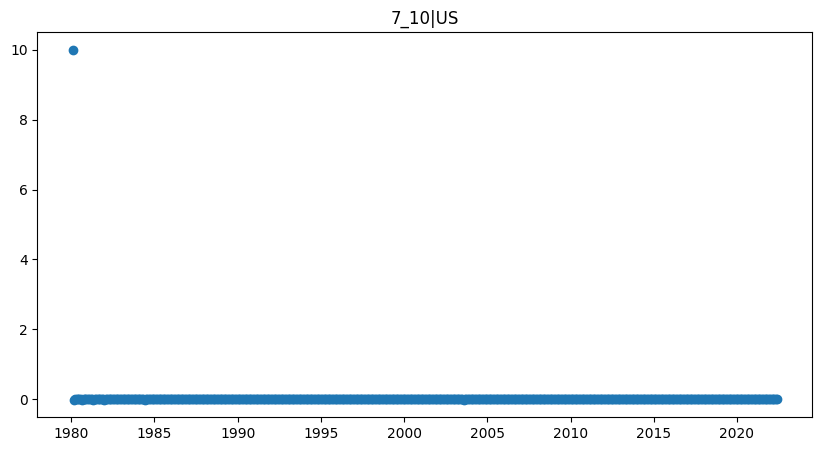

In [58]:
# plot 42 scatter plots of df_list
for i in range(42):
    plt.figure(figsize=(10,5))
    plt.scatter(df_list[i]['Date'], df_list[i]['Return_PD'])
    plt.title(df_list[i]['Bond'].iloc[0])
    plt.show()

# Correlation

<AxesSubplot: >

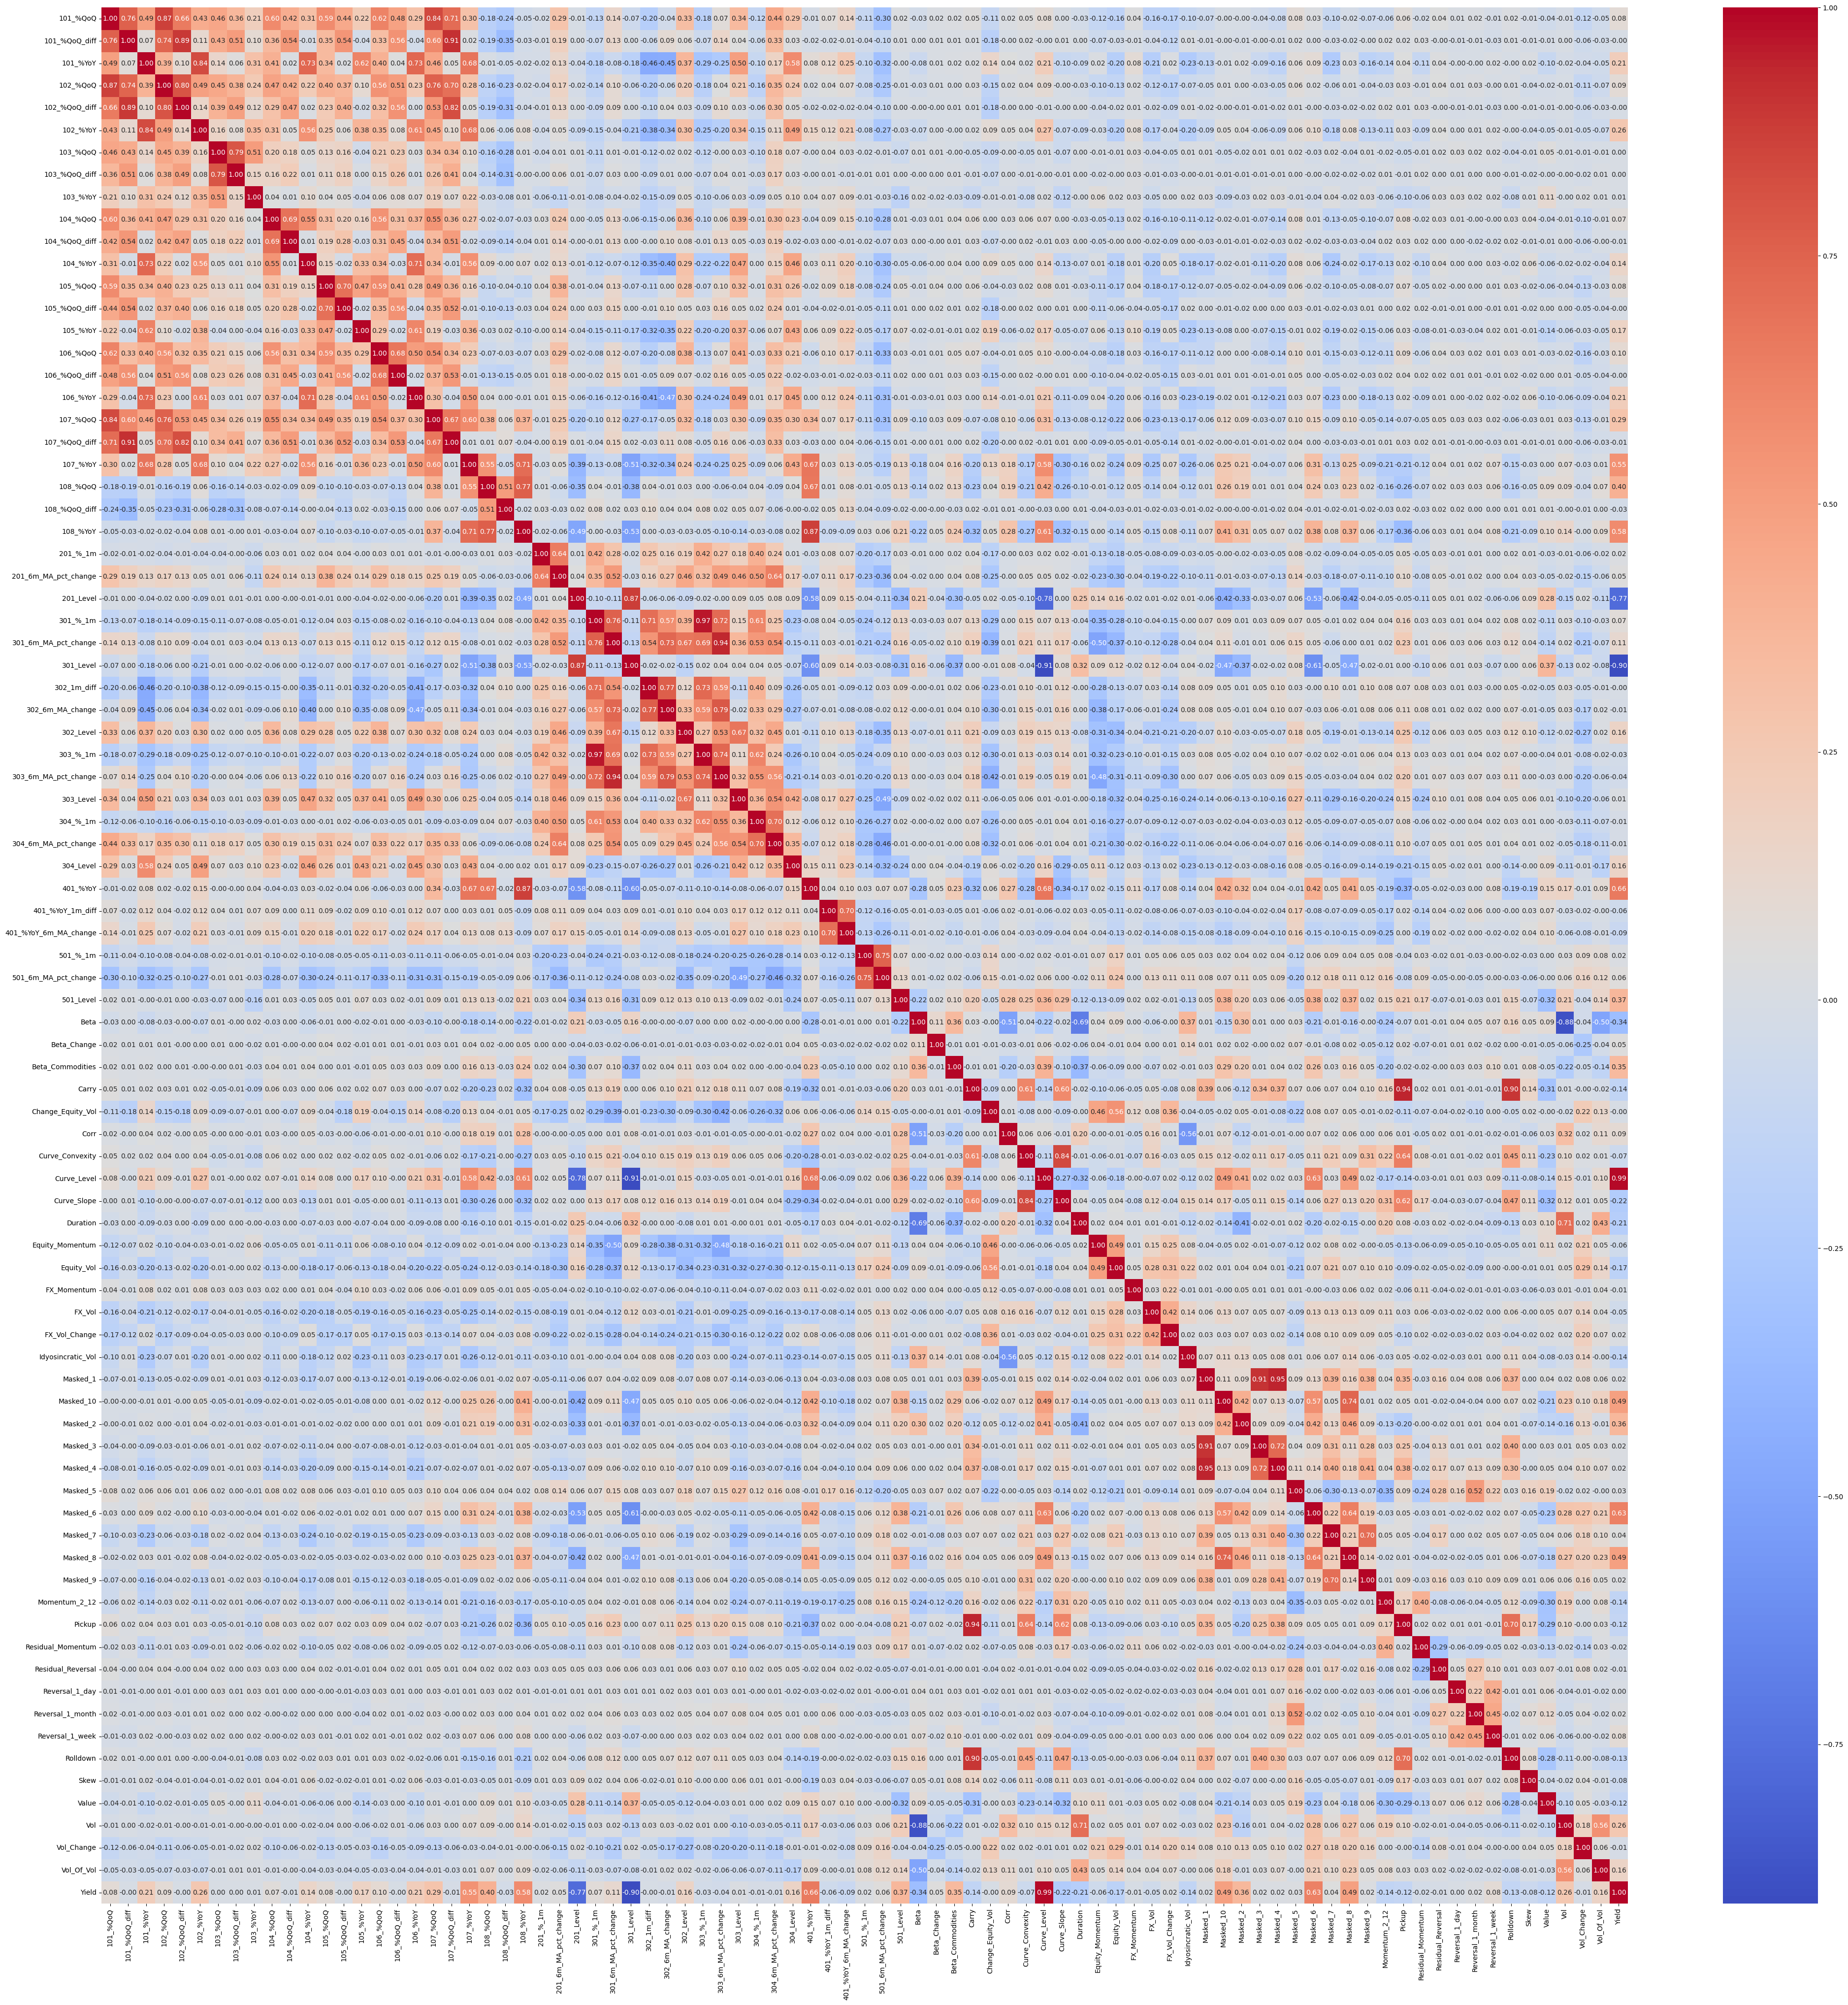

In [41]:
# correlation matrix of df from columns 3:
corr = df.iloc[:, 3:].corr()
plt.figure(figsize=(50,50))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')